# Imports

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Init Plugin
Init Graph Optimizer
Init Kernel


# Load data

In [2]:
df = pd.read_csv("data/matchingscores_keypoints.csv")
df.head(100)

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
0,0,IMG_20190323_114826.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1,1,IMG_20190323_114836.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
2,2,IMG_20190323_114931.jpg,"[""zaal_14__IMG_20190323_114931__01.png""]",[227.0],"[""zaal_19__IMG_20190323_121411__10.png""]",[1397.0],[0.05762862499997823],"[""zaal_14__IMG_20190323_114931__01.png""]",[142.0],"[""Zaal_D__20190323_114017__01.png""]",...,"[""zaal_14__IMG_20190323_114931__01.png""]",[108.0],"[""zaal_19__IMG_20190323_121545__10.png""]",[813.0],[0.35246041599998534],"[""zaal_14__IMG_20190323_114931__01.png""]",[0.12903177738189697],"[""zaal_S__IMG_20190323_122915__01.png""]",[0.196569561958313],[0.1331765000000189]
3,3,IMG_20190323_114845.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
4,4,IMG_20190323_114924.jpg,"[""zaal_S__IMG_20190323_122553__07.png""]",[1417.0],"[""zaal_19__IMG_20190323_121045__01.png""]",[1426.0],[0.05746595899998397],"[""zaal_14__IMG_20190323_114924__01.png""]",[1059.0],"[""Zaal_E__20190323_115309__01.png""]",...,"[""zaal_14__IMG_20190323_114924__01.png""]",[661.0],"[""zaal_15__IMG_20190323_120146__01.png""]",[844.0],[0.37609387500003777],"[""zaal_17__IMG_20190323_120545__01.png""]",[0.32107996940612793],"[""zaal_15__IMG_20190323_120301__01.png""]",[0.3423105478286743],[0.07590808300000162]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,20190323_123223.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
96,96,20190323_123155.jpg,"[""Zaal_M__20190323_123155__01.png""]",[194.0],"[""zaal_19__IMG_20190323_121545__03.png""]",[1380.0],[0.0683865409999953],"[""Zaal_M__20190323_123155__01.png""]",[126.0],"[""Zaal_D__20190323_114047__01.png""]",...,"[""Zaal_M__20190323_123155__01.png""]",[90.0],"[""zaal_19__IMG_20190323_121545__08.png""]",[861.0],[0.36884379200000694],"[""Zaal_M__20190323_123155__01.png""]",[0.11036437749862671],"[""zaal_S__IMG_20190323_122759__01.png""]",[0.21444380283355713],[0.08968808299999864]
97,97,IMG_20190323_123708.jpg,"[""zaal_P__IMG_20190323_123708__01.png""]",[182.0],"[""Zaal_I__20190323_121222__01.png""]",[1416.0],[0.06563895899998329],"[""zaal_P__IMG_20190323_123708__01.png""]",[142.0],"[""zaal_5__IMG_20190323_112800__01.png""]",...,"[""zaal_P__IMG_20190323_123708__01.png""]",[102.0],"[""zaal_17__IMG_20190323_120524__01.png""]",[914.0],[0.3621533329999238],"[""zaal_P__IMG_20190323_123708__01.png""]",[0.09117567539215088],"[""zaal_15__IMG_20190323_120008__01.png""]",[0.1684597134590149],[0.0778331660000049]
98,98,IMG_20190323_123722.jpg,"[""zaal_P__IMG_20190323_123722__01.png""]",[183.0],"[""zaal_17__IMG_20190323_120608__01.png""]",[1417.0],[0.057136667000008856],"[""zaal_P__IMG_20190323_123722__01.png""]",[141.0],"[""zaal_19__IMG_20190323_121545__08.png""]",...,"[""zaal_P__IMG_20190323_123722__01.png""]",[92.0],"[""Zaal_B__20190323_112302__01.png""]",[892.0],[0.36542866700006016],"[""zaal_P__IMG_20190323_123722__01.png""]",[0.08285748958587646],"[""zaal_S__IMG_20190323_122542__01.png""]",[0.14221251010894775],[0.07914529199999265]


# Preprocessing
## Convert datatypes

In [3]:
def convert_float(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.float32)
    descriptors = [d[0] for d  in descriptors]
    return descriptors

def convert_object(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.object_)
    descriptors = [d[0] for d  in descriptors]
    return np.array(descriptors)

df['result_50_features'] = df['result_50_features'].apply(lambda x: convert_object(x))
df['second_result_50_features'] = df['second_result_50_features'].apply(lambda x: convert_object(x))
df['result_100_features'] = df['result_100_features'].apply(lambda x: convert_object(x))
df['second_result_100_features'] = df['second_result_100_features'].apply(lambda x: convert_object(x))
df['result_200_features'] = df['result_200_features'].apply(lambda x: convert_object(x))
df['second_result_200_features'] = df['second_result_200_features'].apply(lambda x: convert_object(x))
df['result_300_features'] = df['result_300_features'].apply(lambda x: convert_object(x))
df['second_result_300_features'] = df['second_result_300_features'].apply(lambda x: convert_object(x))
df['result_fvector'] = df['result_fvector'].apply(lambda x: convert_object(x))
df['second_result_fvector'] = df['second_result_fvector'].apply(lambda x: convert_object(x))

df['distance_50_features'] = df['distance_50_features'].apply(lambda x: convert_float(x))
df['second_distance_50_features'] = df['second_distance_50_features'].apply(lambda x: convert_float(x))
df['time_50_features'] = df['time_50_features'].apply(lambda x: convert_float(x))
df['distance_100_features'] = df['distance_100_features'].apply(lambda x: convert_float(x))
df['second_distance_100_features'] = df['second_distance_100_features'].apply(lambda x: convert_float(x))
df['time_100_features'] = df['time_100_features'].apply(lambda x: convert_float(x))
df['distance_200_features'] = df['distance_200_features'].apply(lambda x: convert_float(x))
df['second_distance_200_features'] = df['second_distance_200_features'].apply(lambda x: convert_float(x))
df['time_200_features'] = df['time_200_features'].apply(lambda x: convert_float(x))
df['distance_300_features'] = df['distance_300_features'].apply(lambda x: convert_float(x))
df['second_distance_300_features'] = df['second_distance_300_features'].apply(lambda x: convert_float(x))
df['time_300_features'] = df['time_300_features'].apply(lambda x: convert_float(x))
df['distance_fvector'] = df['distance_fvector'].apply(lambda x: convert_float(x))
df['second_distance_fvector'] = df['second_distance_fvector'].apply(lambda x: convert_float(x))
df['time_fvector'] = df['time_fvector'].apply(lambda x: convert_float(x))
df.head()

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
0,0,IMG_20190323_114826.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1,1,IMG_20190323_114836.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
2,2,IMG_20190323_114931.jpg,[zaal_14__IMG_20190323_114931__01.png],[227.0],[zaal_19__IMG_20190323_121411__10.png],[1397.0],[0.057628624],[zaal_14__IMG_20190323_114931__01.png],[142.0],[Zaal_D__20190323_114017__01.png],...,[zaal_14__IMG_20190323_114931__01.png],[108.0],[zaal_19__IMG_20190323_121545__10.png],[813.0],[0.3524604],[zaal_14__IMG_20190323_114931__01.png],[0.12903178],[zaal_S__IMG_20190323_122915__01.png],[0.19656956],[0.1331765]
3,3,IMG_20190323_114845.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
4,4,IMG_20190323_114924.jpg,[zaal_S__IMG_20190323_122553__07.png],[1417.0],[zaal_19__IMG_20190323_121045__01.png],[1426.0],[0.05746596],[zaal_14__IMG_20190323_114924__01.png],[1059.0],[Zaal_E__20190323_115309__01.png],...,[zaal_14__IMG_20190323_114924__01.png],[661.0],[zaal_15__IMG_20190323_120146__01.png],[844.0],[0.37609386],[zaal_17__IMG_20190323_120545__01.png],[0.32107997],[zaal_15__IMG_20190323_120301__01.png],[0.34231055],[0.07590808]


## Filter empty records (bad detection)

In [4]:
print(f"Dataframe rows: {len(df)}")
df = df[df.time_fvector.map(len)  != 0]
print(f"Dataframe rows after filtering: {len(df)}")
df.head()

Dataframe rows: 553
Dataframe rows after filtering: 437


,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
2,2,IMG_20190323_114931.jpg,[zaal_14__IMG_20190323_114931__01.png],[227.0],[zaal_19__IMG_20190323_121411__10.png],[1397.0],[0.057628624],[zaal_14__IMG_20190323_114931__01.png],[142.0],[Zaal_D__20190323_114017__01.png],...,[zaal_14__IMG_20190323_114931__01.png],[108.0],[zaal_19__IMG_20190323_121545__10.png],[813.0],[0.3524604],[zaal_14__IMG_20190323_114931__01.png],[0.12903178],[zaal_S__IMG_20190323_122915__01.png],[0.19656956],[0.1331765]
4,4,IMG_20190323_114924.jpg,[zaal_S__IMG_20190323_122553__07.png],[1417.0],[zaal_19__IMG_20190323_121045__01.png],[1426.0],[0.05746596],[zaal_14__IMG_20190323_114924__01.png],[1059.0],[Zaal_E__20190323_115309__01.png],...,[zaal_14__IMG_20190323_114924__01.png],[661.0],[zaal_15__IMG_20190323_120146__01.png],[844.0],[0.37609386],[zaal_17__IMG_20190323_120545__01.png],[0.32107997],[zaal_15__IMG_20190323_120301__01.png],[0.34231055],[0.07590808]
8,8,IMG_20190323_114917.jpg,[zaal_14__IMG_20190323_114917__01.png],[271.0],[zaal_19__IMG_20190323_121537__12.png],[1458.0],[0.060655],[zaal_14__IMG_20190323_114917__01.png],[182.0],[Zaal_D__20190323_114047__01.png],...,[zaal_14__IMG_20190323_114917__01.png],[121.0],[Zaal_D__20190323_113342__01.png],[883.0],[0.36993635],[zaal_14__IMG_20190323_114917__01.png],[0.07964456],[zaal_14__IMG_20190323_114924__01.png],[0.15992922],[0.07543387]
14,14,IMG_20190323_114601.jpg,[zaal_13__IMG_20190323_114601__01.png],[178.0],[zaal_15__IMG_20190323_115356__01.png],[1322.0],[0.06028821],[zaal_13__IMG_20190323_114601__01.png],[136.0],[zaal_15__IMG_20190323_115356__01.png],...,[zaal_13__IMG_20190323_114601__01.png],[85.0],[Zaal_M__20190323_123455__01.png],[861.0],[0.37919578],[zaal_13__IMG_20190323_114601__01.png],[0.10645366],[zaal_19__IMG_20190323_121245__01.png],[0.16724014],[0.08133484]
16,16,IMG_20190323_114528.jpg,[zaal_13__IMG_20190323_114528__01.png],[307.0],[zaal_19__IMG_20190323_121420__03.png],[1371.0],[0.060505625],[zaal_13__IMG_20190323_114528__01.png],[251.0],[zaal_19__IMG_20190323_121420__03.png],...,[zaal_13__IMG_20190323_114528__01.png],[141.0],[zaal_19__IMG_20190323_121420__09.png],[929.0],[0.3743597],[zaal_13__IMG_20190323_114528__01.png],[0.09250796],[Zaal_M__20190323_123701__01.png],[0.21211547],[0.075523086]


Show failed keypoint matches

In [5]:
df[df.result_50_features.map(len)  == 0]

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
79,79,20190323_123614.jpg,[],[],[],[],[0.052373916],[Zaal_M__20190323_123614__01.png],[240.0],[Zaal_C__20190323_112836__11.png],...,[Zaal_M__20190323_123614__01.png],[168.0],[zaal_2__IMG_20190323_112113__02.png],[692.0],[0.35376576],[Zaal_M__20190323_123614__01.png],[0.24086374],[zaal_V__IMG_20190323_121833__01.png],[0.28992593],[0.07462404]
223,223,20190323_112531.jpg,[],[],[],[],[0.01638575],[],[],[],...,[],[],[],[],[0.044329915],[Zaal_B__20190323_112531__01.png],[0.5915303],[Zaal_C__20190323_112836__10.png],[0.6352927],[0.07349125]
225,225,20190323_112302.jpg,[],[],[],[],[0.0627955],[Zaal_B__20190323_112302__01.png],[228.0],[Zaal_L__20190323_122703__01.png],...,[Zaal_B__20190323_112302__01.png],[175.0],[Zaal_B__20190323_112346__01.png],[692.0],[0.31923229],[Zaal_B__20190323_112346__01.png],[0.32085216],[Zaal_B__20190323_112322__01.png],[0.35806268],[0.08378375]
250,250,20190323_120524.jpg,[],[],[],[],[0.036525793],[zaal_19__IMG_20190323_120852__01.png],[1300.0],[zaal_19__IMG_20190323_121622__10.png],...,[zaal_19__IMG_20190323_121312__02.png],[898.0],[zaal_19__IMG_20190323_121333__02.png],[993.0],[0.26853925],[zaal_S__IMG_20190323_122641__01.png],[0.60323554],[zaal_15__IMG_20190323_115546__01.png],[0.6126693],[0.07111021]
424,424,20190323_112015.jpg,[],[],[],[],[0.049287416],[],[],[],...,[],[],[],[],[0.10058254],[Zaal_C__20190323_113006__05.png],[0.60853493],[Zaal_C__20190323_113006__04.png],[0.6360854],[0.07249104]
434,434,IMG_20190323_122830.jpg,[],[],[],[],[0.001504708],[],[],[],...,[],[],[],[],[0.001723666],[zaal_2__IMG_20190323_112113__01.png],[0.49571615],[zaal_2__IMG_20190323_112200__02.png],[0.6147125],[0.073550835]
520,520,IMG_20190323_120417.jpg,[],[],[],[],[0.017263958],[],[],[],...,[],[],[],[],[0.039438043],[Zaal_C__20190323_113006__03.png],[0.4223783],[zaal_10__IMG_20190323_113904__01.png],[0.4426388],[0.07441908]


## Fetch filename (IMG_... remove prefix)

Filename formats:
- IMG_20190323_111717.jpg
- 20190323_123901.jpg

In [6]:
def clean_filename(filename):
    parts = filename.split("_")
    if(parts[0] == "IMG"):
        filename = ''.join(map(str,parts[1:]))
        parts = filename.split(".")
        filename  = parts[0]
        return filename
    else:
        filename = filename.split(".")[0]
        parts = filename.split("_")
    return parts[0] + parts[1] 

df["filename_original"] = df["filename"]
df["filename"] = df["filename"].apply(lambda x: clean_filename(x))
df.head()

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector,filename_original
2,2,20190323114931,[zaal_14__IMG_20190323_114931__01.png],[227.0],[zaal_19__IMG_20190323_121411__10.png],[1397.0],[0.057628624],[zaal_14__IMG_20190323_114931__01.png],[142.0],[Zaal_D__20190323_114017__01.png],...,[108.0],[zaal_19__IMG_20190323_121545__10.png],[813.0],[0.3524604],[zaal_14__IMG_20190323_114931__01.png],[0.12903178],[zaal_S__IMG_20190323_122915__01.png],[0.19656956],[0.1331765],IMG_20190323_114931.jpg
4,4,20190323114924,[zaal_S__IMG_20190323_122553__07.png],[1417.0],[zaal_19__IMG_20190323_121045__01.png],[1426.0],[0.05746596],[zaal_14__IMG_20190323_114924__01.png],[1059.0],[Zaal_E__20190323_115309__01.png],...,[661.0],[zaal_15__IMG_20190323_120146__01.png],[844.0],[0.37609386],[zaal_17__IMG_20190323_120545__01.png],[0.32107997],[zaal_15__IMG_20190323_120301__01.png],[0.34231055],[0.07590808],IMG_20190323_114924.jpg
8,8,20190323114917,[zaal_14__IMG_20190323_114917__01.png],[271.0],[zaal_19__IMG_20190323_121537__12.png],[1458.0],[0.060655],[zaal_14__IMG_20190323_114917__01.png],[182.0],[Zaal_D__20190323_114047__01.png],...,[121.0],[Zaal_D__20190323_113342__01.png],[883.0],[0.36993635],[zaal_14__IMG_20190323_114917__01.png],[0.07964456],[zaal_14__IMG_20190323_114924__01.png],[0.15992922],[0.07543387],IMG_20190323_114917.jpg
14,14,20190323114601,[zaal_13__IMG_20190323_114601__01.png],[178.0],[zaal_15__IMG_20190323_115356__01.png],[1322.0],[0.06028821],[zaal_13__IMG_20190323_114601__01.png],[136.0],[zaal_15__IMG_20190323_115356__01.png],...,[85.0],[Zaal_M__20190323_123455__01.png],[861.0],[0.37919578],[zaal_13__IMG_20190323_114601__01.png],[0.10645366],[zaal_19__IMG_20190323_121245__01.png],[0.16724014],[0.08133484],IMG_20190323_114601.jpg
16,16,20190323114528,[zaal_13__IMG_20190323_114528__01.png],[307.0],[zaal_19__IMG_20190323_121420__03.png],[1371.0],[0.060505625],[zaal_13__IMG_20190323_114528__01.png],[251.0],[zaal_19__IMG_20190323_121420__03.png],...,[141.0],[zaal_19__IMG_20190323_121420__09.png],[929.0],[0.3743597],[zaal_13__IMG_20190323_114528__01.png],[0.09250796],[Zaal_M__20190323_123701__01.png],[0.21211547],[0.075523086],IMG_20190323_114528.jpg


## Replace arrays

Database filename format:
- zaal_1__IMG_20190323_111717__01.png
- Zaal_C__20190323_113006__03.png

In [7]:
def replace_database_name(array):
    if(len(array) > 0):
        filename = array[0]
        parts = filename.split("__")
        photo = parts[1]
        if("IMG" in parts[1]):
            photo = parts[1][4:]
        parts = photo.split("_")
        photo = ''.join(map(str,parts))
        return photo
    return ""

def replace_distance(array):
    if(len(array) > 0):
        return array[0]
    return None

# Copy original values (later on used)
df["result_50_features_original"] = df["result_50_features"]
df["second_result_50_features_original"] = df["second_result_50_features"]
df["result_100_features_original"] = df["result_100_features"]
df["second_result_100_features_original"] = df["second_result_100_features"]
df["result_200_features_original"] = df["result_200_features"]
df["second_result_200_features_original"] = df["second_result_200_features"]
df["result_300_features_original"] = df["result_300_features"]
df["second_result_300_features_original"] = df["second_result_300_features"]
df["result_fvector_original"] = df["result_fvector"]
df["second_result_fvector_original"] = df["second_result_fvector"]

# Replace arrays
df["result_50_features"] = df["result_50_features"].apply(lambda x: replace_database_name(x))
df["second_result_50_features"] = df["second_result_50_features"].apply(lambda x: replace_database_name(x))
df["result_100_features"] = df["result_100_features"].apply(lambda x: replace_database_name(x))
df["second_result_100_features"] = df["second_result_100_features"].apply(lambda x: replace_database_name(x))
df["result_200_features"] = df["result_200_features"].apply(lambda x: replace_database_name(x))
df["second_result_200_features"] = df["second_result_200_features"].apply(lambda x: replace_database_name(x))
df["result_300_features"] = df["result_300_features"].apply(lambda x: replace_database_name(x))
df["second_result_300_features"] = df["second_result_300_features"].apply(lambda x: replace_database_name(x))
df["result_fvector"] = df["result_fvector"].apply(lambda x: replace_database_name(x))
df["second_result_fvector"] = df["second_result_fvector"].apply(lambda x: replace_database_name(x))


# Copy original values (later on used)
df["distance_50_features_original"] = df["distance_50_features"]
df["second_distance_50_features_original"] = df["second_distance_50_features"]
df["time_50_features_original"] = df["time_50_features"]
df["distance_100_features_original"] = df["distance_100_features"]
df["second_distance_100_features_original"] = df["second_distance_100_features"]
df["time_100_features_original"] = df["time_100_features"]
df["distance_200_features_original"] = df["distance_200_features"]
df["second_distance_200_features_original"] = df["second_distance_200_features"]
df["time_200_features_original"] = df["time_200_features"]
df["distance_300_features_original"] = df["distance_300_features"]
df["second_distance_300_features_original"] = df["second_distance_300_features"]
df["time_300_features_original"] = df["time_300_features"]
df["distance_fvector_original"] = df["distance_fvector"]
df["second_distance_fvector_original"] = df["second_distance_fvector"]
df["time_fvector_original"] = df["time_fvector"]

# Replace arrays
df["distance_50_features"] = df["distance_50_features"].apply(lambda x: replace_distance(x))
df["second_distance_50_features"] = df["second_distance_50_features"].apply(lambda x: replace_distance(x))
df["time_50_features"] = df["time_50_features"].apply(lambda x: replace_distance(x))
df["distance_100_features"] = df["distance_100_features"].apply(lambda x: replace_distance(x))
df["second_distance_100_features"] = df["second_distance_100_features"].apply(lambda x: replace_distance(x))
df["time_100_features"] = df["time_100_features"].apply(lambda x: replace_distance(x))
df["distance_200_features"] = df["distance_200_features"].apply(lambda x: replace_distance(x))
df["second_distance_200_features"] = df["second_distance_200_features"].apply(lambda x: replace_distance(x))
df["time_200_features"] = df["time_200_features"].apply(lambda x: replace_distance(x))
df["distance_300_features"] = df["distance_300_features"].apply(lambda x: replace_distance(x))
df["second_distance_300_features"] = df["second_distance_300_features"].apply(lambda x: replace_distance(x))
df["time_300_features"] = df["time_300_features"].apply(lambda x: replace_distance(x))
df["distance_fvector"] = df["distance_fvector"].apply(lambda x: replace_distance(x))
df["second_distance_fvector"] = df["second_distance_fvector"].apply(lambda x: replace_distance(x))
df["time_fvector"] = df["time_fvector"].apply(lambda x: replace_distance(x))

df.head()

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,time_100_features_original,distance_200_features_original,second_distance_200_features_original,time_200_features_original,distance_300_features_original,second_distance_300_features_original,time_300_features_original,distance_fvector_original,second_distance_fvector_original,time_fvector_original
2,2,20190323114931,20190323114931,227.0,20190323121411,1397.0,0.057629,20190323114931,142.0,20190323114017,...,[0.098736376],[127.0],[894.0],[0.25084424],[108.0],[813.0],[0.3524604],[0.12903178],[0.19656956],[0.1331765]
4,4,20190323114924,20190323122553,1417.0,20190323121045,1426.0,0.057466,20190323114924,1059.0,20190323115309,...,[0.10449396],[742.0],[971.0],[0.24614838],[661.0],[844.0],[0.37609386],[0.32107997],[0.34231055],[0.07590808]
8,8,20190323114917,20190323114917,271.0,20190323121537,1458.0,0.060655,20190323114917,182.0,20190323114047,...,[0.10910829],[152.0],[972.0],[0.22451825],[121.0],[883.0],[0.36993635],[0.07964456],[0.15992922],[0.07543387]
14,14,20190323114601,20190323114601,178.0,20190323115356,1322.0,0.060288,20190323114601,136.0,20190323115356,...,[0.10513841],[115.0],[956.0],[0.2487635],[85.0],[861.0],[0.37919578],[0.10645366],[0.16724014],[0.08133484]
16,16,20190323114528,20190323114528,307.0,20190323121420,1371.0,0.060506,20190323114528,251.0,20190323121420,...,[0.11186291],[190.0],[1021.0],[0.23905654],[141.0],[929.0],[0.3743597],[0.09250796],[0.21211547],[0.075523086]


# Matching results
## Correct matches

In [8]:

print(f'Total records: {len(df)}')
print(f'50 features right matches: {len(df[df.filename == df.result_50_features])}') 
print(f'100 features right matches: {len(df[df.filename == df.result_100_features])}') 
print(f'200 features right matches: {len(df[df.filename == df.result_200_features])}') 
print(f'300 features right matches: {len(df[df.filename == df.result_300_features])}') 
print(f'Feature vector right matches: {len(df[df.filename == df.result_fvector])}') 


Total records: 437
50 features right matches: 402
100 features right matches: 423
200 features right matches: 424
300 features right matches: 425
Feature vector right matches: 360


## Incorrect matches

In [9]:
print(f'Total records: {len(df)}')
print(f'50 features wrong matches: {len(df[df.filename != df.result_50_features])}') 
print(f'100 features wrong matches: {len(df[df.filename != df.result_100_features])}') 
print(f'200 features wrong matches: {len(df[df.filename != df.result_200_features])}') 
print(f'300 features wrong matches: {len(df[df.filename != df.result_300_features])}') 
print(f'Feature vector wrong matches: {len(df[df.filename != df.result_fvector])}') 

Total records: 437
50 features wrong matches: 35
100 features wrong matches: 14
200 features wrong matches: 13
300 features wrong matches: 12
Feature vector wrong matches: 77


## Ratio

In [10]:
total_records = len(df)

print(f'50 features right matches: {len(df[df.filename == df.result_50_features])/total_records*100.0}%') 
print(f'100 features right matches: {len(df[df.filename == df.result_100_features])/total_records*100.0}%') 
print(f'200 features right matches: {len(df[df.filename == df.result_200_features])/total_records*100.0}%') 
print(f'300 features right matches: {len(df[df.filename == df.result_300_features])/total_records*100.0}%') 
print(f'Feature vector right matches: {len(df[df.filename == df.result_fvector])/total_records*100.0}%') 

50 features right matches: 91.9908466819222%
100 features right matches: 96.79633867276888%
200 features right matches: 97.02517162471396%
300 features right matches: 97.25400457665904%
Feature vector right matches: 82.37986270022884%


## Distance distribution

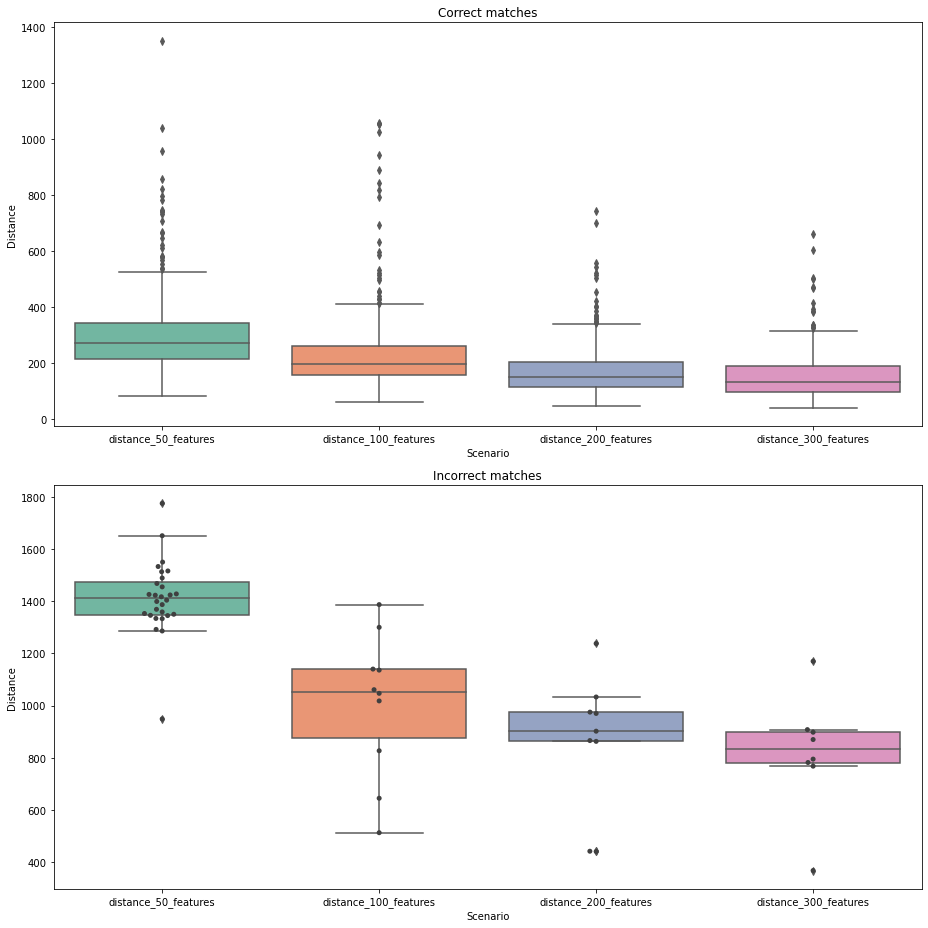

In [15]:
sub_df_a = pd.DataFrame(df[df.filename == df.result_50_features]["distance_50_features"]).assign(Trial=1)
sub_df_b = pd.DataFrame(df[df.filename == df.result_100_features]["distance_100_features"]).assign(Trial=2)
sub_df_c = pd.DataFrame(df[df.filename == df.result_200_features]["distance_200_features"]).assign(Trial=3)
sub_df_d = pd.DataFrame(df[df.filename == df.result_300_features]["distance_300_features"]).assign(Trial=4)

cdf = pd.concat([sub_df_a, sub_df_b, sub_df_c, sub_df_d])    
mdf = pd.melt(cdf, id_vars=['Trial']) 


f, axarr = plt.subplots(2,1,figsize=(13,13), sharey=False)

sns.boxplot(ax=axarr[0], x="variable", y="value", data=mdf, palette="Set2")
#sns.swarmplot(ax=axarr[0], x="variable", y="value", data=mdf, color=".95")
axarr[0].set_title("Correct matches")
axarr[0].set(xlabel='Scenario', ylabel='Distance')
axarr[0].tick_params(axis='x', rotation=0)

sub_df_a = pd.DataFrame(df[df.filename != df.result_50_features]["distance_50_features"]).assign(Trial=1)
sub_df_b = pd.DataFrame(df[df.filename != df.result_100_features]["distance_100_features"]).assign(Trial=2)
sub_df_c = pd.DataFrame(df[df.filename != df.result_200_features]["distance_200_features"]).assign(Trial=3)
sub_df_d = pd.DataFrame(df[df.filename != df.result_300_features]["distance_300_features"]).assign(Trial=4)

cdf = pd.concat([sub_df_a, sub_df_b, sub_df_c, sub_df_d])    
mdf = pd.melt(cdf, id_vars=['Trial']) 

sns.boxplot(ax=axarr[1], x="variable", y="value", data=mdf, palette="Set2")
sns.swarmplot(ax=axarr[1], x="variable", y="value", data=mdf, color=".25")
axarr[1].set_title("Incorrect matches")
axarr[1].set(xlabel='Scenario', ylabel='Distance')
axarr[1].tick_params(axis='x', rotation=0)
f.tight_layout()
f.savefig('/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/benchmark_images/bxplt_distance_keypoints.png',bbox_inches='tight', dpi=150)

## Average distance values

In [16]:
print("Global")
sub_df = df
print(f'50 features distance mean: {sub_df.distance_50_features.mean()}') 
print(f'100 features distance mean: {sub_df.distance_100_features.mean()}') 
print(f'200 features distance mean: {sub_df.distance_200_features.mean()}') 
print(f'300 features distance mean: {sub_df.distance_300_features.mean()}') 
print(f'Feature vector distance mean: {sub_df.distance_fvector.mean()}') 

print("\nCorrect matches")
sub_df = df[df.filename == df.result_50_features]
print(f'50 features distance mean: {sub_df.distance_50_features.mean()}') 
sub_df = df[df.filename == df.result_100_features]
print(f'100 features distance mean: {sub_df.distance_100_features.mean()}') 
sub_df = df[df.filename == df.result_200_features]
print(f'200 features distance mean: {sub_df.distance_200_features.mean()}') 
sub_df = df[df.filename == df.result_300_features]
print(f'300 features distance mean: {sub_df.distance_300_features.mean()}') 
sub_df = df[df.filename == df.result_fvector]
print(f'Feature vector distance mean: {sub_df.distance_fvector.mean()}') 


print("\nIncorrect matches")
sub_df = df[df.filename != df.result_50_features]
print(f'50 features distance mean: {sub_df.distance_50_features.mean()}') 
sub_df = df[df.filename != df.result_100_features]
print(f'100 features distance mean: {sub_df.distance_100_features.mean()}') 
sub_df = df[df.filename != df.result_200_features]
print(f'200 features distance mean: {sub_df.distance_200_features.mean()}') 
sub_df = df[df.filename != df.result_300_features]
print(f'300 features distance mean: {sub_df.distance_300_features.mean()}') 
sub_df = df[df.filename != df.result_fvector]
print(f'Feature vector distance mean: {sub_df.distance_fvector.mean()}') 

Global
50 features distance mean: 374.9813953488372
100 features distance mean: 247.87759815242495
200 features distance mean: 187.71362586605082
300 features distance mean: 164.63741339491918
Feature vector distance mean: 0.15946702659130096

Correct matches
50 features distance mean: 302.65671641791045
100 features distance mean: 229.92198581560282
200 features distance mean: 173.46698113207546
300 features distance mean: 152.3035294117647
Feature vector distance mean: 0.1412077397108078

Incorrect matches
50 features distance mean: 1413.357142857143
100 features distance mean: 1007.4
200 features distance mean: 858.8888888888889
300 features distance mean: 819.875
Feature vector distance mean: 0.24483522772789001


# Distance between first and second result ("difference")
## Setup

In [17]:
df["diffrence_50"] =  df["second_distance_50_features"] - df["distance_50_features"]
df["diffrence_100"] =  df["second_distance_100_features"] - df["distance_100_features"]
df["diffrence_200"] =  df["second_distance_200_features"] - df["distance_200_features"]
df["diffrence_300"] =  df["second_distance_300_features"] - df["distance_300_features"]
df["diffrence_fvector"] =  df["second_distance_fvector"] - df["distance_fvector"]
df

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,second_distance_300_features_original,time_300_features_original,distance_fvector_original,second_distance_fvector_original,time_fvector_original,diffrence_50,diffrence_100,diffrence_200,diffrence_300,diffrence_fvector
2,2,20190323114931,20190323114931,227.0,20190323121411,1397.0,0.057629,20190323114931,142.0,20190323114017,...,[813.0],[0.3524604],[0.12903178],[0.19656956],[0.1331765],1170.0,920.0,767.0,705.0,0.067538
4,4,20190323114924,20190323122553,1417.0,20190323121045,1426.0,0.057466,20190323114924,1059.0,20190323115309,...,[844.0],[0.37609386],[0.32107997],[0.34231055],[0.07590808],9.0,9.0,229.0,183.0,0.021231
8,8,20190323114917,20190323114917,271.0,20190323121537,1458.0,0.060655,20190323114917,182.0,20190323114047,...,[883.0],[0.36993635],[0.07964456],[0.15992922],[0.07543387],1187.0,1005.0,820.0,762.0,0.080285
14,14,20190323114601,20190323114601,178.0,20190323115356,1322.0,0.060288,20190323114601,136.0,20190323115356,...,[861.0],[0.37919578],[0.10645366],[0.16724014],[0.08133484],1144.0,933.0,841.0,776.0,0.060786
16,16,20190323114528,20190323114528,307.0,20190323121420,1371.0,0.060506,20190323114528,251.0,20190323121420,...,[929.0],[0.3743597],[0.09250796],[0.21211547],[0.075523086],1064.0,900.0,831.0,788.0,0.119608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,548,20190323112956,20190323113850,1489.0,20190323120524,1506.0,0.071717,20190323112956,817.0,20190323113257,...,[868.0],[0.36867547],[0.42362893],[0.4260484],[0.07706875],17.0,350.0,585.0,629.0,0.002419
549,549,20190323112910,20190323112910,276.0,20190323121411,1314.0,0.062956,20190323112910,212.0,20190323111804,...,[878.0],[0.37005568],[0.1245839],[0.2507888],[0.08685492],1038.0,900.0,775.0,710.0,0.126205
550,550,20190323112904,20190323112904,246.0,20190323122939,1383.0,0.059426,20190323112904,162.0,20190323113829,...,[939.0],[0.36930758],[0.12158859],[0.20430887],[0.07739275],1137.0,984.0,846.0,811.0,0.082720
551,551,20190323112938,20190323112938,224.0,20190323123029,1336.0,0.060370,20190323112938,198.0,20190323121420,...,"[900.0, 829.0]","[0.3584146, 0.35853374]","[0.102653205, 0.13854152]","[0.22195822, 0.30041897]","[0.079194166, 0.073526375]",1112.0,940.0,805.0,764.0,0.119305


## Distance distribution

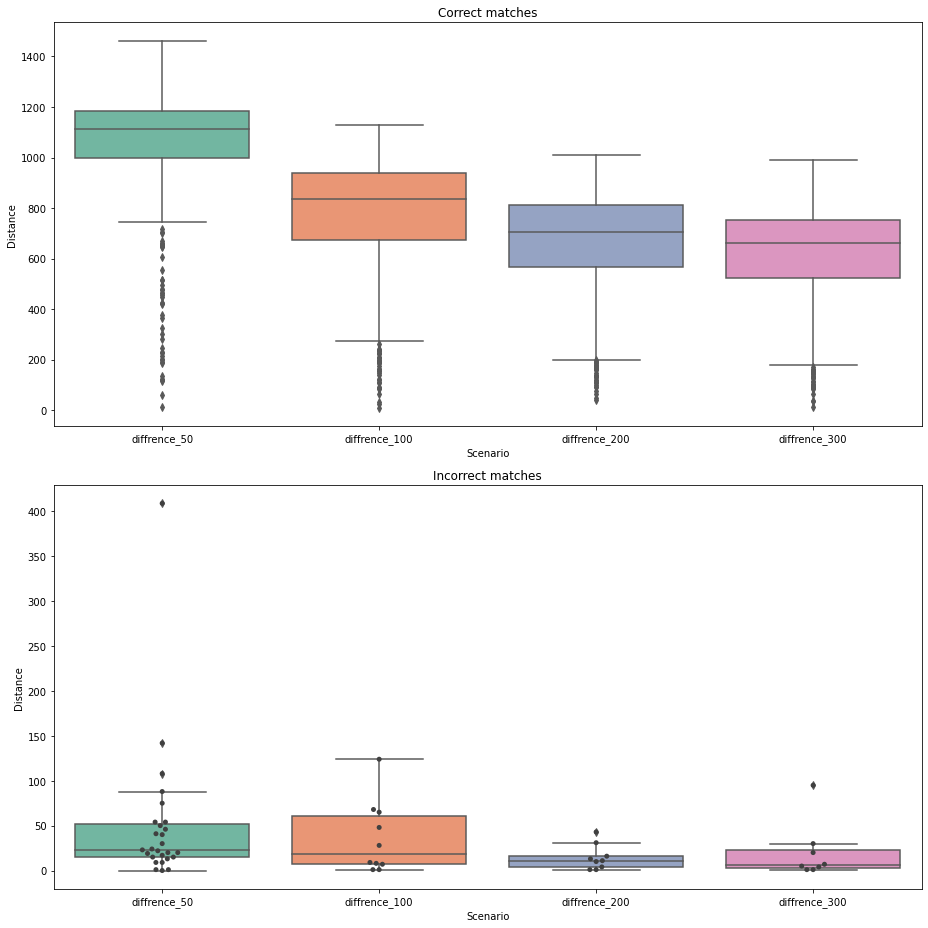

In [19]:
sub_df_a = pd.DataFrame(df[df.filename == df.result_50_features]["diffrence_50"]).assign(Trial=1)
sub_df_b = pd.DataFrame(df[df.filename == df.result_100_features]["diffrence_100"]).assign(Trial=2)
sub_df_c = pd.DataFrame(df[df.filename == df.result_200_features]["diffrence_200"]).assign(Trial=3)
sub_df_d = pd.DataFrame(df[df.filename == df.result_300_features]["diffrence_300"]).assign(Trial=4)

cdf = pd.concat([sub_df_a, sub_df_b, sub_df_c, sub_df_d])    
mdf = pd.melt(cdf, id_vars=['Trial']) 


f, axarr = plt.subplots(2,1,figsize=(13,13), sharey=False)

sns.boxplot(ax=axarr[0], x="variable", y="value", data=mdf, palette="Set2")
#sns.swarmplot(ax=axarr[0], x="variable", y="value", data=mdf, color=".95")
axarr[0].set_title("Correct matches")
axarr[0].set(xlabel='Scenario', ylabel='Distance')
axarr[0].tick_params(axis='x', rotation=0)

sub_df_a = pd.DataFrame(df[df.filename != df.result_50_features]["diffrence_50"]).assign(Trial=1)
sub_df_b = pd.DataFrame(df[df.filename != df.result_100_features]["diffrence_100"]).assign(Trial=2)
sub_df_c = pd.DataFrame(df[df.filename != df.result_200_features]["diffrence_200"]).assign(Trial=3)
sub_df_d = pd.DataFrame(df[df.filename != df.result_300_features]["diffrence_300"]).assign(Trial=4)

cdf = pd.concat([sub_df_a, sub_df_b, sub_df_c, sub_df_d])    
mdf = pd.melt(cdf, id_vars=['Trial']) 

sns.boxplot(ax=axarr[1], x="variable", y="value", data=mdf, palette="Set2")
sns.swarmplot(ax=axarr[1], x="variable", y="value", data=mdf, color=".25")
axarr[1].set_title("Incorrect matches")
axarr[1].set(xlabel='Scenario', ylabel='Distance')
axarr[1].tick_params(axis='x', rotation=0)
f.tight_layout()
f.savefig('/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/benchmark_images/bxplt_difference_keypoints.png',bbox_inches='tight', dpi=150)

# Time distribution

[Text(0.5, 0, 'Scenario'), Text(0, 0.5, 'Distance')]

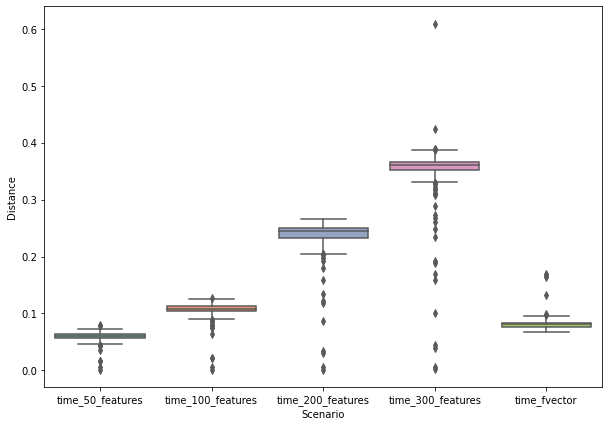

In [23]:
boxplot_columns =  df[["time_50_features","time_100_features","time_200_features","time_300_features","time_fvector"]]
ax = sns.boxplot(data=boxplot_columns, palette="Set2")
ax.figure.set_size_inches(10, 7)
ax.set(xlabel='Scenario', ylabel='Distance')

# Average timing

In [24]:
print(f"Average: {df.time_50_features.mean()}")
print(f"Average: {df.time_100_features.mean()}")
print(f"Average: {df.time_200_features.mean()}")
print(f"Average: {df.time_300_features.mean()}")
print(f"Average: {df.time_fvector.mean()}")

Average: 0.060039591044187546
Average: 0.1071176528930664
Average: 0.23807528614997864
Average: 0.352964848279953
Average: 0.08152622729539871


# Visualization

IMG_20190323_121820.jpg
20190323_112531.jpg
IMG_20190323_111309.jpg
20190323_120524.jpg
IMG_20190323_113829.jpg
IMG_20190323_121300.jpg
IMG_20190323_121339.jpg
20190323_112015.jpg
IMG_20190323_122830.jpg
IMG_20190323_122646.jpg
IMG_20190323_122958.jpg
IMG_20190323_120417.jpg


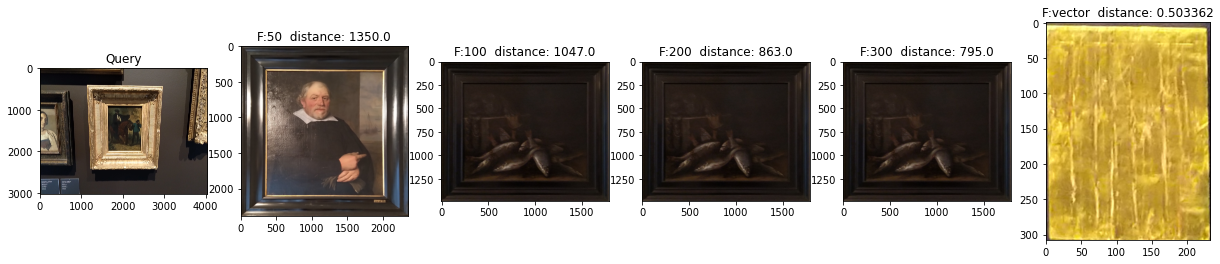

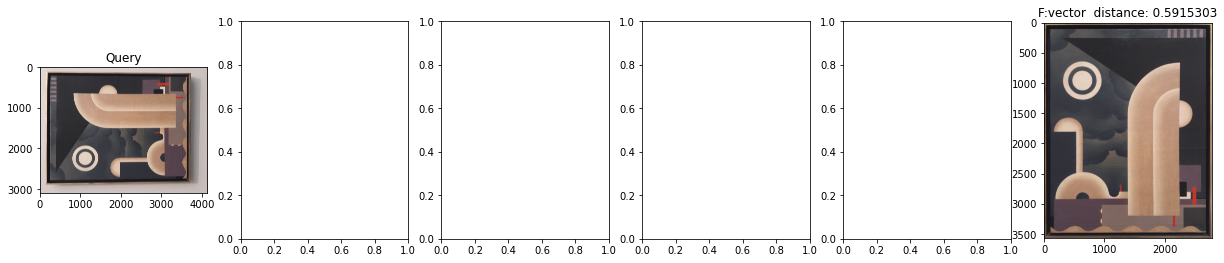

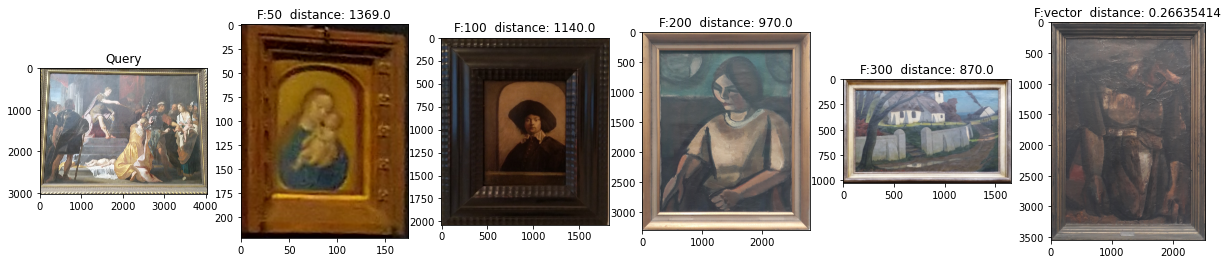

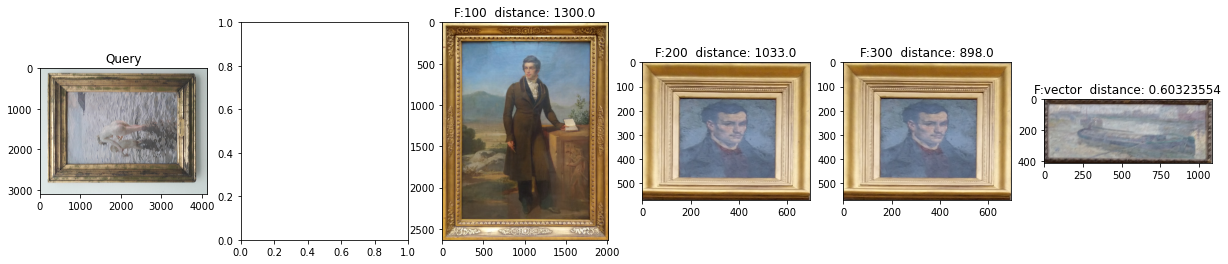

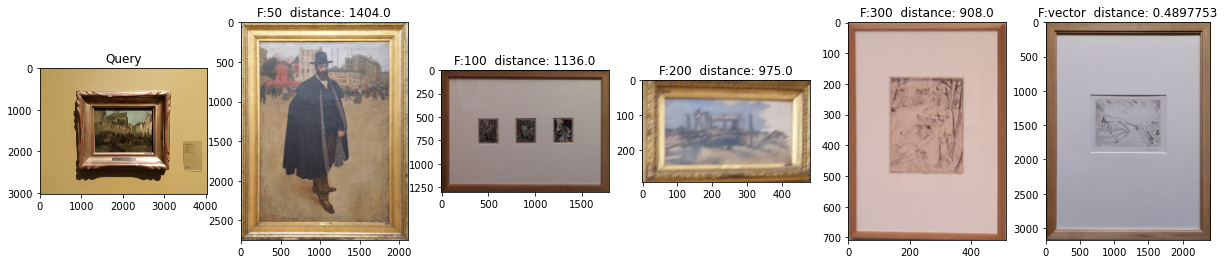

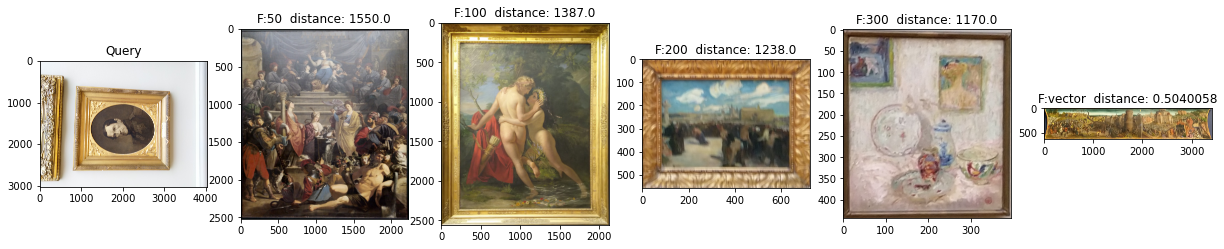

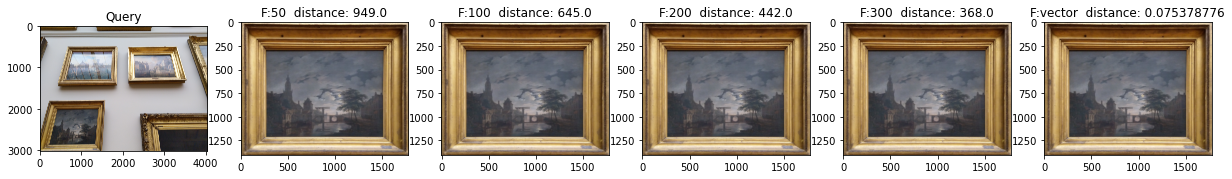

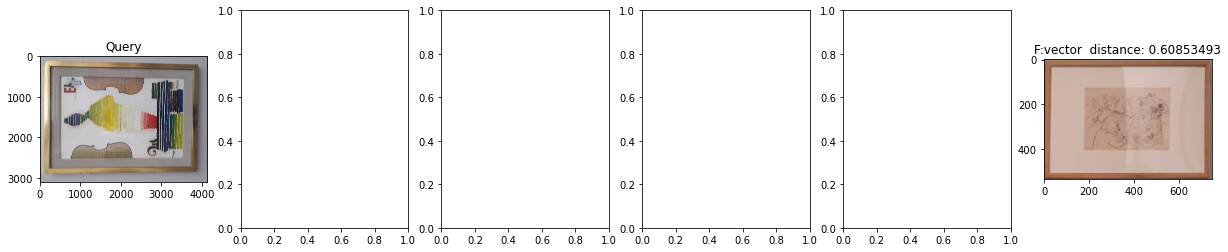

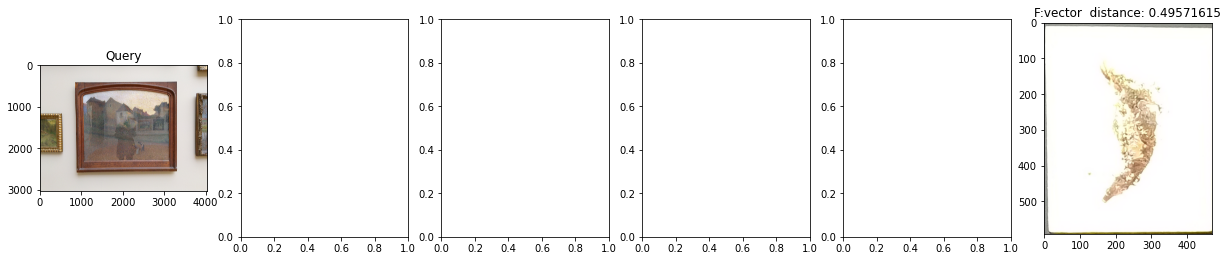

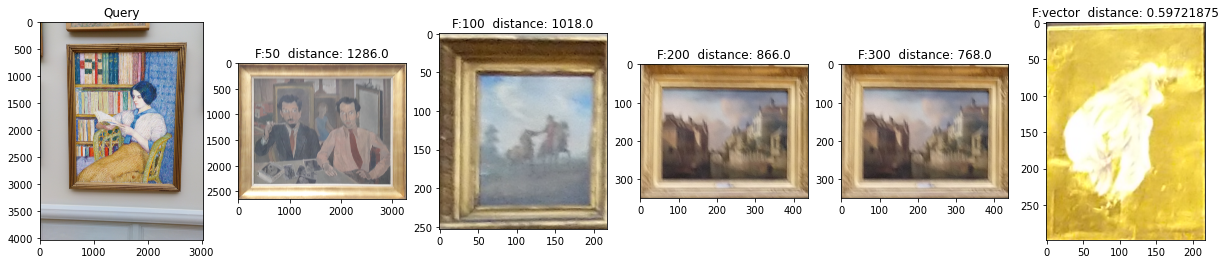

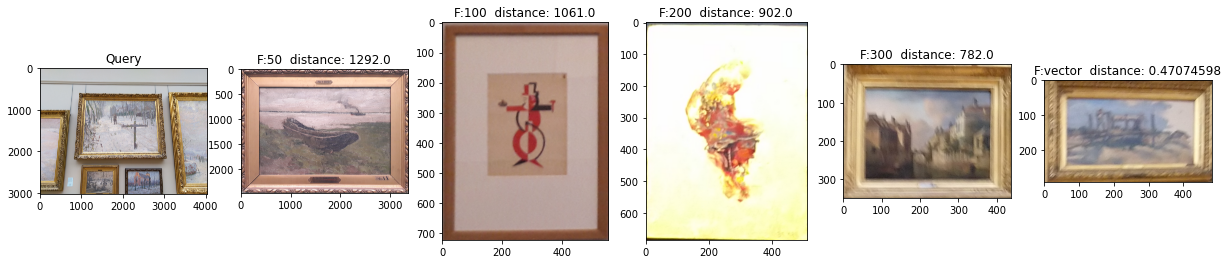

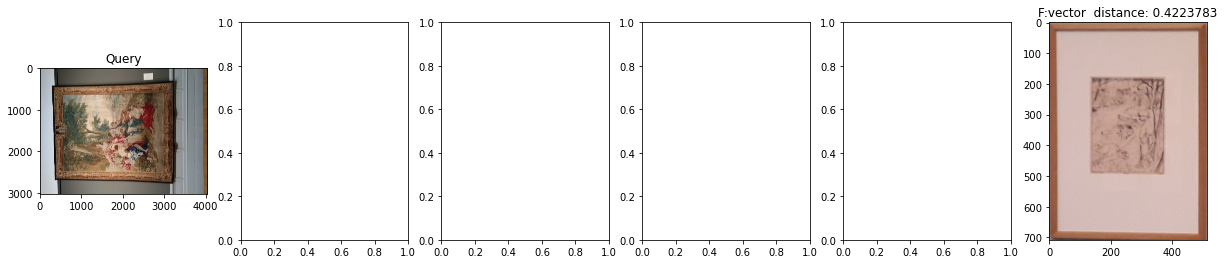

In [25]:
DATABASE_DIR = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/"
TEST_IMAGE_DIR = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Computervisie 2020 Project Database/dataset_pictures_msk"


def load_image(path):
    # img = tf.keras.utils.load_img(path)
    img = tf.keras.preprocessing.image.load_img(path)
    return img


def get_directory(img):
    directory_list = os.listdir(TEST_IMAGE_DIR)

    for file in directory_list:
        directory = os.fsdecode(file)
        sub_dir_path = TEST_IMAGE_DIR + '/' + directory

        if (os.path.isdir(sub_dir_path)):
            for image_name in os.listdir(sub_dir_path):
                filename = os.fsdecode(image_name)
                if filename == img:
                    return sub_dir_path

    
def show_row(df,index):
    global TEST_IMAGE_DIR
    global DATABASE_DIR

    print(df.iloc[index].filename_original)
    
    directory = get_directory(df.iloc[index].filename_original)

    image = load_image(directory + "/" + df.iloc[index].filename_original)
    plt.figure(figsize = (5,5))
    plt.imshow(image)
    plt.title("query")


    f, axarr = plt.subplots(5,2,figsize=(15,15))

    if (len(df.iloc[index].result_50_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_50_features_original[0])
        axarr[0,0].imshow(image)
        axarr[0,0].text(0, 0, "F:50  distance: " + str(df.iloc[index].distance_50_features_original[0]))

    if (len(df.iloc[index].second_result_50_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_50_features_original[0])
        axarr[0,1].imshow(image)
        axarr[0,1].text(0, 0, "S:50  distance: " + str(df.iloc[index].second_distance_50_features_original[0]))

    if (len(df.iloc[index].result_100_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_100_features_original[0])
        axarr[1,0].imshow(image)
        axarr[1,0].text(0, 0, "F:100  distance: " + str(df.iloc[index].distance_100_features_original[0]))

    if (len(df.iloc[index].second_result_100_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_100_features_original[0])
        axarr[1,1].imshow(image)
        axarr[1,1].text(0, 0, "S:100  distance: " + str(df.iloc[index].second_distance_100_features_original[0]))

    if (len(df.iloc[index].result_200_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_200_features_original[0])
        axarr[2,0].imshow(image)
        axarr[2,0].text(0, 0, "F:200  distance: " + str(df.iloc[index].distance_200_features_original[0]))

    if (len(df.iloc[index].second_result_200_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_200_features_original[0])
        axarr[2,1].imshow(image)
        axarr[2,1].text(0, 0, "S:200  distance: " + str(df.iloc[index].second_distance_200_features_original[0]))

    if (len(df.iloc[index].result_300_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_300_features_original[0])
        axarr[3,0].imshow(image)
        axarr[3,0].text(0, 0, "F:300  distance: " + str(df.iloc[index].distance_300_features_original[0]))

    if (len(df.iloc[index].second_result_300_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_300_features_original[0])
        axarr[3,1].imshow(image)
        axarr[3,1].text(0, 0, "S:300  distance: " + str(df.iloc[index].second_distance_300_features_original[0]))


    if (len(df.iloc[index].result_fvector_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_fvector_original[0])
        axarr[4,0].imshow(image)
        axarr[4,0].text(0, 0, "F:vector  distance: " + str(df.iloc[index].distance_fvector_original[0]))

    if (len(df.iloc[index].second_result_fvector_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_fvector_original[0])
        axarr[4,1].imshow(image)
        axarr[4,1].text(0, 0, "S:vector  distance: " + str(df.iloc[index].second_distance_fvector_original[0]))


def show_row_first_results(df,index):
    global TEST_IMAGE_DIR
    global DATABASE_DIR

    print(df.iloc[index].filename_original)
    
    directory = get_directory(df.iloc[index].filename_original)



    f, axarr = plt.subplots(1,6,figsize=(21,4))


    image = load_image(directory + "/" + df.iloc[index].filename_original)
    axarr[0].imshow(image)
    axarr[0].set_title("Query")

    if (len(df.iloc[index].result_50_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_50_features_original[0])
        axarr[1].imshow(image)
        axarr[1].set_title("F:50  distance: " + str(df.iloc[index].distance_50_features_original[0]))


    if (len(df.iloc[index].result_100_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_100_features_original[0])
        axarr[2].imshow(image)
        axarr[2].set_title("F:100  distance: " + str(df.iloc[index].distance_100_features_original[0]))



    if (len(df.iloc[index].result_200_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_200_features_original[0])
        axarr[3].imshow(image)
        axarr[3].set_title("F:200  distance: " + str(df.iloc[index].distance_200_features_original[0]))



    if (len(df.iloc[index].result_300_features_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_300_features_original[0])
        axarr[4].imshow(image)
        axarr[4].set_title("F:300  distance: " + str(df.iloc[index].distance_300_features_original[0]))


    if (len(df.iloc[index].result_fvector_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_fvector_original[0])
        axarr[5].imshow(image)
        axarr[5].set_title("F:vector  distance: " + str(df.iloc[index].distance_fvector_original[0]))





# print(df.iloc[0].filename)
# print(get_directory(df.iloc[0].filename))


sub_test = df[df.filename != df.result_300_features]
# print(len(sub_test))
# show_row(sub_test,0)

# sub_test = df[df.filename != df.result_50_features]
# print(len(sub_test))

# show_row_first_results(sub_test,2)



for i in range(0,len(sub_test)):
    show_row_first_results(sub_test,i)